## FACET2e BMAD simple example

You will need to install pytao, BMAD, and openpmd-beamphysics (as well as standard libraries like numpy, matplotlib and pandas)

 conda install -c conda-forge bmad
 conda install -c conda-forge pytao, openpmd-beamphysics

In [1]:
from pytao import Tao
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import re
import io
from os import path,environ
import pandas as pd

from pmd_beamphysics import ParticleGroup
from pmd_beamphysics.statistics import resample_particles

from plotNMM import plotNMM
from IPython.display import display

#needed for lattice_init
#%env FACET2_LATTICE /u/ar/dcesar/notebooks/facet_bmad
#%env FACET2_LATTICE /Users/nmajik/Documents/SLAC/slacsyncgit/bmadExample

import os
filePath = os.getcwd()
%env FACET2_LATTICE {filePath}

print('Make sure enviornment was set!:  ', environ['FACET2_LATTICE']) 

env: FACET2_LATTICE=/Users/nmajik/Documents/SLAC/slacsyncgit/bmadExample
Make sure enviornment was set!:   /Users/nmajik/Documents/SLAC/slacsyncgit/bmadExample


# Start tao

In [2]:
tao=Tao('-init {:s}/bmad/models/f2_elec/tao.init -noplot'.format(environ['FACET2_LATTICE'])) 
#tao=Tao('-init {:s}/bmad/models/f2_elec/tao.init'.format(environ['FACET2_LATTICE'])) 

## Plot single particle twiss

In [3]:
elements=tao.lat_ele_list();
#tao.lat_list(elements[0],'ElementType')
#tao.ele_gen_attribs(elements[0])

In [4]:
floorplan=pd.read_csv(
    io.StringIO('\n'.join(tao.show('lat -all -floor_coords -tracking_elements')[3:-5])), 
    sep="[\s\n]+",
    engine='python',
    names=['Index','ElementName','ElementType','s','ds','X','Y','Z','Theta','Phi','Psi'])
floorplan.drop(0,inplace=True)
floorplan[::25].head(7)

,Index,ElementName,ElementType,s,ds,X,Y,Z,Theta,Phi,Psi
1,1,DL00,Drift,-0.86905,-0.86905,10.69357,0.0,1001.56206,-0.61087,0.0,0.0
26,26,DL01H,Drift,1.03220,0.09012,9.60305,0.0,1003.11948,-0.61087,0.0,0.0
51,51,L0BF#2,Lcavity,5.25643,0.33713,7.18014,0.0,1006.57976,-0.61087,0.0,0.0
76,76,QE10441,Quadrupole,8.50702,0.10800,5.31568,0.0,1009.24248,-0.61087,0.0,0.0
101,101,QE10511#1,Quadrupole,11.14513,0.05400,3.80475,0.0,1011.40031,-0.61087,0.0,0.0
126,126,BPM10581,Monitor,14.40167,0.00000,1.93688,0.0,1014.06791,-0.61087,0.0,0.0
151,151,QB10731#1,Quadrupole,17.73408,0.05340,0.26540,0.0,1016.91774,-0.30543,0.0,0.0


In [5]:

#Get twiss functions
tao.cmd('set global lattice_calc_on = T')
s=np.array([tao.lat_list(x,'ele.s')[0] for x in floorplan.Index])
x=np.array([tao.lat_list(x,'orbit.floor.x')[0] for x in floorplan.Index])
beta_y=np.array([tao.lat_list(x,'ele.a.beta')[0] for x in floorplan.Index])
beta_x=np.array([tao.lat_list(x,'ele.b.beta')[0] for x in floorplan.Index])
etot=np.array([tao.lat_list(x,'ele.e_tot')[0] for x in floorplan.Index])
eta_y=np.array([tao.lat_list(x,'ele.y.eta')[0] for x in floorplan.Index])
eta_x=np.array([tao.lat_list(x,'ele.x.eta')[0] for x in floorplan.Index])

"""
fig = plt.figure(num=1,figsize=[3.375*5,3.375*2])
fig.clf()
ax,ax_fp=format_longitudinal_plot(fig)

ax.semilogy(s,beta_x,label='beta b')
ax.semilogy(s,beta_y,label='beta a')
plt.legend(loc=2)
ax.set_ylim([0.1,250])
ax_r=ax.twinx()
ax_r.plot(s,eta_x*1e3,'C0--',label='eta b')
ax_r.plot(s,eta_y*1e3,'C1--',label='eta a')
plt.legend(loc=1)
#ax_r.plot(s,beta_y,'k--')
#ax_r.plot(s,np.array([tao.lat_list(x,'ele.x.eta')[0] for x in floorplan.Index]),'--')

ax.set_facecolor('w')
zmin=13
zmax=1020

ax.set_xlabel('Z [m]',fontsize=14)
ax.set_ylabel(r'$\beta$ [m]',fontsize=14)
ax_r.set_ylabel(r'$\eta$ [mm]',fontsize=14)

ax.set_xlim([zmin,zmax])
ax_fp.set_ylim([-1,3])

plt.show()
#fig.savefig('beamline',transparent=False,bbox_inches='tight', dpi=300)
"""
;

''

# Track particles

## Setup

In [6]:
#tao.cmd('set beam_init n_particle = 10000'); # limit to 10k particles for now

In [7]:
#numMacroParticles = 100000
#tao.cmd(f"set beam_init n_particle = {numMacroParticles}") # limit to 10k particles for now

#Change tracking start/end
#tao.cmd('set beam_init track_end = ENDDL10')
tao.cmd('set beam_init track_end = PENT')
#Can see present track_start and track_end values with `show beam`



#Optional: Enable CSR
tao.cmd(f'call {filePath}/bmad/models/f2_elec/scripts/Activate_CSR.tao')
tao.cmd('csron')
#tao.cmd('csroff')

[]

Before match
{'alpha_x': -7.990788473328799, 'beta_x': 36.23004898433273, 'gamma_x': 1.790025192997371, 'emit_x': 3.045268971323036e-08, 'eta_x': -0.0017376422414646206, 'etap_x': -0.0004062503450052696, 'norm_emit_x': 3.6946218044711316e-06}
{'alpha_y': -8.019313309992421, 'beta_y': 36.37269082964837, 'gamma_y': 1.7955610232330173, 'emit_y': 3.0511848423318116e-08, 'eta_y': -0.0017629506825284854, 'etap_y': -0.00040771104033566775, 'norm_emit_y': 3.7017991363348466e-06}
After match
{'alpha_x': -4.999920453413793, 'beta_x': 35.00482011280344, 'gamma_x': 0.742732128223566, 'emit_x': 3.1335700937513987e-08, 'eta_x': 0.01462880850531495, 'etap_x': 0.002589204276985584, 'norm_emit_x': 3.8016894320822466e-06}
{'alpha_y': -4.395402572444236, 'beta_y': 51.29116827144152, 'gamma_y': 0.3961610635639033, 'emit_y': 3.009603387359349e-08, 'eta_y': 0.013482842273587018, 'etap_y': 0.00037622574324116766, 'norm_emit_y': 3.6512913546432024e-06}
7.68685049544739e-06


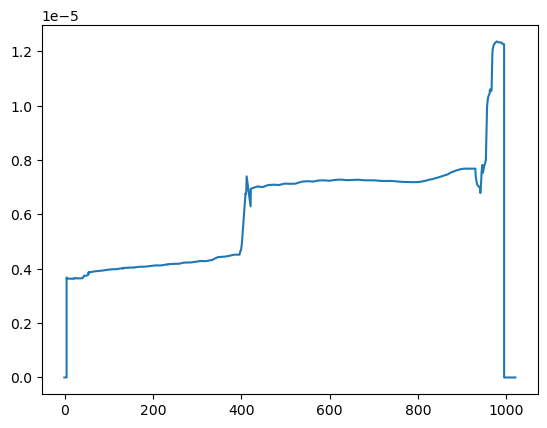

In [8]:
#P = ParticleGroup('/Users/nmajik/Documents/SLAC/slacsyncgit/bmadExample/bmad/beams/L0AFEND.h5')
#P = ParticleGroup('/Users/nmajik/Documents/SLAC/slacsyncgit/bmadExample/bmad/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch.h5')
#P = ParticleGroup('/Users/nmajik/Documents/SLAC/slacsyncgit/bmadExample/bmad/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample.h5')
#P = ParticleGroup(f'{filePath}/bmad/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample.h5')
P = ParticleGroup(f'{filePath}/bmad/beams/L0AFEND.h5')

# === For original example beam ===
print("Before match")
print(P.twiss(plane='x'))
print(P.twiss(plane='y'))
#display(plotNMM(P, 'x', 'xp',bins=100))

numMacroParticles = 1000
P.data.update(resample_particles(P, n=numMacroParticles))

#P.gamma=P.gamma-np.mean(P.gamma)+tao.lat_list('L0AFEND','ele.e_tot')[0]*1e-6/0.511;
P.twiss_match(plane='x',
              beta=35,
              alpha=-5,
              inplace=True)
P.twiss_match(plane='y',beta=tao.lat_list('L0AFEND','ele.b.beta'),alpha=tao.lat_list('L0AFEND','ele.b.alpha'),inplace=True)


print("After match")
print(P.twiss(plane='x'))
print(P.twiss(plane='y'))
#display(plotNMM(P, 'x', 'xp',bins=100))

# === For 2024-02-16_2bunch ===
#P.t=P.t-np.mean(P.t) #This is sloppy because beam weights are not used!!!

#numMacroParticles = 10000
#P.data.update(resample_particles(P, n=numMacroParticles))

P.write(f'{filePath}/bmad/beams/activeBeamFile.h5')




tao.cmd(f'set beam_init position_file={filePath}/bmad/beams/activeBeamFile.h5')# IF you want to change the beam to the new matched beam at the start
#tao.cmd('set beam_init position_file=/Users/cemma/Downloads/facet2-lattice/bmad/beams/L0AFEND.h5')# 
tao.cmd('reinit beam')

#display(plotNMM(P, 'x', 'xp',bins=100))
#display(plotNMM(P, 'delta_t', 'energy',bins=100))
#display(plotNMM(P, 'x', 'y',bins=100))

tao.cmd('set global track_type = beam') #set "track_type = single" to return to single particle
tao.cmd('set global track_type = single') #return to single to prevent accidental long re-evaluation



#P.plot('delta_t', 'energy',bins=300)
#P.plot('x', 'y',bins=100)

emitData=np.array([tao.bunch_params(x)['twiss_norm_emit_x'] for x in floorplan.Index])

print( tao.bunch_params("BEGBC20")['twiss_norm_emit_x'] ) 
plt.plot(s,emitData)
plt.show()


# Automate

In [9]:
#Sample on grid
"""
outputData = pd.DataFrame()


for assertBetaX in np.arange(30,60,1):
    for assertAlphaX in np.arange(-7,-2,0.1):

        P = ParticleGroup(f'{filePath}/bmad/beams/L0AFEND.h5')
        
        # === For original example beam ===
        #print("Before match")
        #print(P.twiss(plane='x'))
        #print(P.twiss(plane='y'))
        #display(plotNMM(P, 'x', 'xp',bins=100))
        
        numMacroParticles = 10000
        P.data.update(resample_particles(P, n=numMacroParticles))
        
        #P.gamma=P.gamma-np.mean(P.gamma)+tao.lat_list('L0AFEND','ele.e_tot')[0]*1e-6/0.511;
        P.twiss_match(plane='x',
                      beta=assertBetaX,
                      alpha=assertAlphaX,
                      inplace=True)
        P.twiss_match(plane='y',beta=tao.lat_list('L0AFEND','ele.b.beta'),alpha=tao.lat_list('L0AFEND','ele.b.alpha'),inplace=True)
        
        
        #print("After match")
        #print(P.twiss(plane='x'))
        #print(P.twiss(plane='y'))
        #display(plotNMM(P, 'x', 'xp',bins=100))
        
        # === For 2024-02-16_2bunch ===
        #P.t=P.t-np.mean(P.t) #This is sloppy because beam weights are not used!!!
        
        #numMacroParticles = 10000
        #P.data.update(resample_particles(P, n=numMacroParticles))
        
        P.write(f'{filePath}/bmad/beams/activeBeamFile.h5')
        
        
        
        
        tao.cmd(f'set beam_init position_file={filePath}/bmad/beams/activeBeamFile.h5')# IF you want to change the beam to the new matched beam at the start
        #tao.cmd('set beam_init position_file=/Users/cemma/Downloads/facet2-lattice/bmad/beams/L0AFEND.h5')# 
        tao.cmd('reinit beam')
        
        #display(plotNMM(P, 'x', 'xp',bins=100))
        #display(plotNMM(P, 'delta_t', 'energy',bins=100))
        #display(plotNMM(P, 'x', 'y',bins=100))
        
        tao.cmd('set global track_type = beam') #set "track_type = single" to return to single particle
        tao.cmd('set global track_type = single') #return to single to prevent accidental long re-evaluation
        
        
        
        #P.plot('delta_t', 'energy',bins=300)
        #P.plot('x', 'y',bins=100)
        
        emitData=np.array([tao.bunch_params(x)['twiss_norm_emit_x'] for x in floorplan.Index])
        
        
        print(f"{assertBetaX}, {assertAlphaX}")
        print( tao.bunch_params("BEGBC20")['twiss_norm_emit_x'] ) 
        #plt.plot(s,emitData)
        #plt.show()
        
        #Collect desired data as a pandas Series
        tmpData = pd.Series({
            "betaX": assertBetaX,
            "alphaX": assertAlphaX,
            "emitData": emitData,
            "finalEmit": tao.bunch_params("BEGBC20")['twiss_norm_emit_x']
        #    "fig": outputFig
        })
        
        #Convert the Series to a DataFrame, transpose it so it's the right orientation, then append it to the overall output
        outputData = pd.concat([outputData, tmpData.to_frame().T])
"""
;

''

In [10]:
#Optimization example code
from scipy.optimize import minimize

class OptimizationProblem:
    def __init__(self):
        self.history = pd.DataFrame()

    def rosen(self, x):
        """Rosenbrock function."""
        value = 100.0 * (x[1] - x[0]**2)**2 + (1 - x[0])**2
        #additional_info = {'x0': x[0], 'x1': x[1], 'rosen_value': value}
        #self.history.append(additional_info)

        tmpData = pd.Series({
            "x0": x[0],
            "x1": x[1],
            "value": value
        })

        self.history = pd.concat([self.history, tmpData.to_frame().T])
        
        return value

# Instantiate the optimization problem
problem = OptimizationProblem()

# Initial guess
x0 = np.array([1.3, 0.7])

# Since we cannot use 'Newton-CG' without derivatives, we choose a method that does not require them, e.g., 'Nelder-Mead'.
res = minimize(problem.rosen, x0, method='BFGS')

# Convert history to a pandas DataFrame
#history_df = pd.DataFrame(problem.history)

print(res)
print(problem.history)  # Display the last few rows of additional information

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.0115158804656543e-11
        x: [ 1.000e+00  1.000e+00]
      nit: 31
      jac: [ 1.914e-06 -9.625e-07]
 hess_inv: [[ 4.997e-01  9.991e-01]
            [ 9.991e-01  2.002e+00]]
     nfev: 114
     njev: 38
          x0        x1         value
0   1.300000  0.700000  9.810000e+01
0   1.300000  0.700000  9.810001e+01
0   1.300000  0.700000  9.810000e+01
0   0.357180  1.062201  8.776539e+01
0   0.357180  1.062201  8.776539e+01
..       ...       ...           ...
0   0.999994  0.999989  3.222985e-11
0   0.999994  0.999989  3.151593e-11
0   0.999996  0.999991  2.011516e-11
0   0.999996  0.999991  2.014368e-11
0   0.999996  0.999991  2.010082e-11

[114 rows x 3 columns]


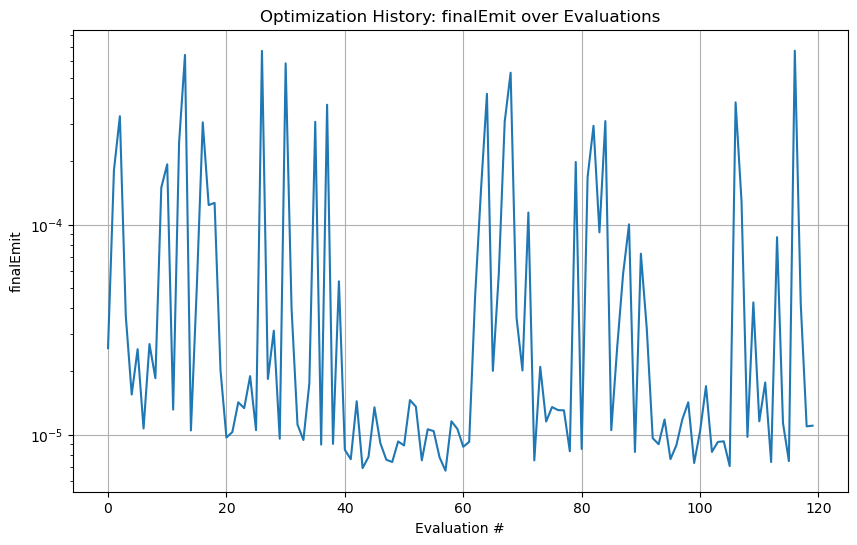

| 120       | 9.053e+04 | -11.65    | 136.4     |
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.0115158804656543e-11
        x: [ 1.000e+00  1.000e+00]
      nit: 31
      jac: [ 1.914e-06 -9.625e-07]
 hess_inv: [[ 4.997e-01  9.991e-01]
            [ 9.991e-01  2.002e+00]]
     nfev: 114
     njev: 38
         betaX     alphaX                                           emitData  \
0    108.32835   -3.31912  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
0    46.047553 -19.995425  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
0    14.758451 -14.129764  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
0    52.488548 -12.549592  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
0    81.283693  -4.129301  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
..         ...        ...                                                ...   
0   123.733719 -15.266784  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
0     1.2614

In [11]:
#Optimization example code
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
from IPython.display import display, clear_output

class OptimizationProblem:
    def __init__(self):
        self.history = pd.DataFrame()

    def rosen(self, x):
        """Rosenbrock function."""
        value = 100.0 * (x[1] - x[0]**2)**2 + (1 - x[0])**2
        #additional_info = {'x0': x[0], 'x1': x[1], 'rosen_value': value}
        #self.history.append(additional_info)

        tmpData = pd.Series({
            "x0": x[0],
            "x1": x[1],
            "value": value
        })

        self.history = pd.concat([self.history, tmpData.to_frame().T])
        
        return value

    def finalEmittance(self, x):
        [assertBetaX, assertAlphaX] = x
        
        P = ParticleGroup(f'{filePath}/bmad/beams/L0AFEND.h5')
        
        numMacroParticles = 10000
        P.data.update(resample_particles(P, n=numMacroParticles))
        
        
        P.twiss_match(plane='x',
                      beta=assertBetaX,
                      alpha=assertAlphaX,
                      inplace=True)
        P.twiss_match(plane='y',beta=tao.lat_list('L0AFEND','ele.b.beta'),alpha=tao.lat_list('L0AFEND','ele.b.alpha'),inplace=True)
        
    
        
        P.write(f'{filePath}/bmad/beams/activeBeamFile.h5')
        
        
        
        
        tao.cmd(f'set beam_init position_file={filePath}/bmad/beams/activeBeamFile.h5')
        tao.cmd('reinit beam')
        

        
        tao.cmd('set global track_type = beam') #set "track_type = single" to return to single particle
        tao.cmd('set global track_type = single') #return to single to prevent accidental long re-evaluation
        
        
        
        emitData=np.array([tao.bunch_params(x)['twiss_norm_emit_x'] for x in floorplan.Index])
        finalEmit = tao.bunch_params("BEGBC20")['twiss_norm_emit_x']    

        #print(f"{assertBetaX}, {assertAlphaX}: {finalEmit}")
        
        #Collect desired data as a pandas Series
        tmpData = pd.Series({
            "betaX": assertBetaX,
            "alphaX": assertAlphaX,
            "emitData": emitData,
            "finalEmit": finalEmit
        #    "fig": outputFig
        })

        self.history = pd.concat([self.history, tmpData.to_frame().T])

        self.updatePlot()
        
        return finalEmit

    def finalEmittanceBayesWrapper(self, assertBetaX, assertAlphaX):
        return 1/self.finalEmittance([assertBetaX, assertAlphaX])

    def updatePlot(self):
        # Clear the previous figure to prevent flickering
        clear_output(wait=True)
        
        # Create a new figure
        plt.figure(figsize=(10, 6))
        #plt.plot(self.history.index, self.history['finalEmit'], '-o', markersize=8)
        plt.plot(np.arange(len(self.history['finalEmit'])), self.history['finalEmit'], '-')
        plt.title('Optimization History: finalEmit over Evaluations')
        plt.xlabel('Evaluation #')
        plt.ylabel('finalEmit')
        plt.yscale('log')
        plt.grid(True)
        
        # Show plot
        plt.show()

# Instantiate the optimization problem
problem = OptimizationProblem()

# Since we cannot use 'Newton-CG' without derivatives, we choose a method that does not require them, e.g., 'Nelder-Mead'.
#x0 = np.array([50.0, -3.0])
#res = minimize(problem.finalEmittance, x0, method='BFGS')

#Objective function is noisy so using, e.g. BFGS is less than ideal. Try DE
"""
res = differential_evolution(
    problem.finalEmittance, 
    bounds = [(0, 80), (-5, 5)],
    popsize = 3, #Actual population = num (unequal) dimensions * popsize
    polish = False
)
"""


#Try https://github.com/bayesian-optimization/BayesianOptimization
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'assertBetaX': (1, 150), 'assertAlphaX': (-20, 20)}

optimizer = BayesianOptimization(
    f=problem.finalEmittanceBayesWrapper,
    pbounds=pbounds,
    random_state=1,
)

optimizer.maximize(
    init_points=20, #Initial, random points
    n_iter=100,
)


print(res)
print(problem.history) 

In [12]:
problem.history = problem.history.sort_values(by='finalEmit', ascending=True)

In [13]:
problem.history.to_csv('output_data.csv', index=False)


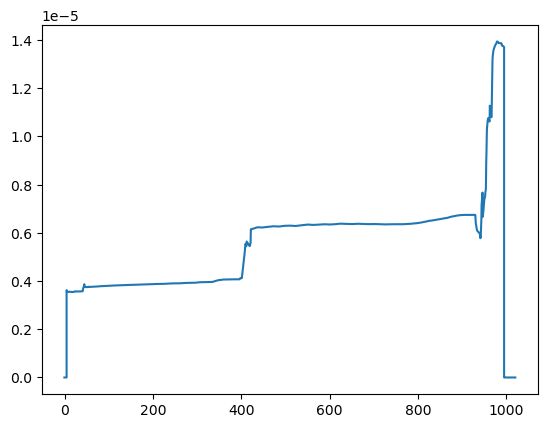

In [14]:
problem.history.iloc[0]
plt.plot(s,problem.history.iloc[0]["emitData"])
plt.show()




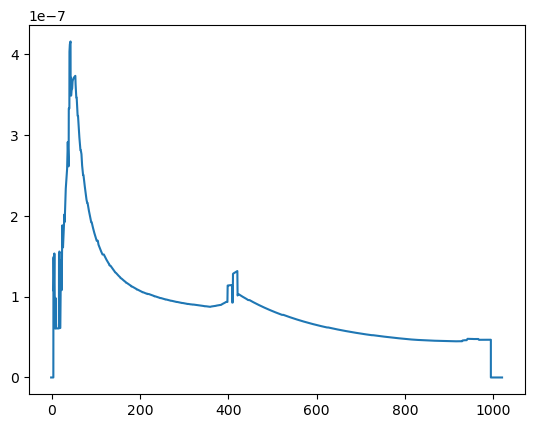

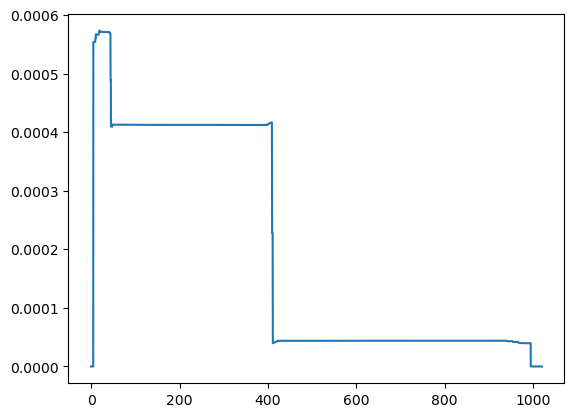

In [15]:
plt.plot(
    s,
    np.array([tao.bunch_params(x)['twiss_emit_z'] for x in floorplan.Index])
)
plt.show()


plt.plot(
    s,
    np.array([tao.bunch_params(x)['twiss_sigma_z'] for x in floorplan.Index])
)
plt.show()